# Introduction to Computer Vision: Plant Seedlings Classification

## Problem Statement

### Context

In recent times, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need to put in to check if plants are growing correctly is still highly extensive. Despite several advances in agricultural technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term. The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on the requirement for manual labor, and this is where Artificial Intelligence can actually benefit the workers in this field, as **the time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning.** The ability to do so far more efficiently and even more effectively than experienced manual labor, could lead to better crop yields, the freeing up of human inolvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.


### Objective

:The aim of this project is to Build a Convolutional Neural Netowrk (CNN) to classify plant seedlings into their respective categories.

### Data Dictionary

The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has recently released a dataset containing **images of unique plants belonging to 12 different species.**

- The dataset can be download from Olympus.
- The data file names are:
    - images.npy
    - Label.csv
- Due to the large volume of data, the images were converted to the images.npy file and the labels are also put into Labels.csv, so that you can work on the data/project seamlessly without having to worry about the high data volume.

- The goal of the project is to create a classifier capable of determining a plant's species from an image.

**List of Species**

- Black-grass
- Charlock
- Cleavers
- Common Chickweed
- Common Wheat
- Fat Hen
- Loose Silky-bent
- Maize
- Scentless Mayweed
- Shepherds Purse
- Small-flowered Cranesbill
- Sugar beet

####**Note: Please use GPU runtime to execute the code efficiently**

***Steps and tasks that I will employ to carry out this project are as follows:***

1. Import the libraries, load dataset, print shape of data, visualize the images in dataset.

2. Data Pre-processing:

   i.  Normalization.

   ii. Gaussian Blurring.

   iii. Visualize data after pre-processing.

3. Working on the data to make it compatible:

   i. Convert labels to one-hot-vectors.

   ii. Print the label for y_train.

   iii. Split the dataset into training, testing, and validation set.

iv. First split images and labels into training and testing set with test_size = 0.3.

v. Then further split test data into test and validation set with test_size = 0.5

vi. Check the shape of data, Reshape data into shapes compatible with Keras models if it’s not already. If it’s already in the compatible shape, then comment in the notebook that it’s already in compatible shape.

4. Building CNN:

  i. Define layers.

  ii. Set optimizer and loss function. (Use Adam optimizer and categorical crossentropy.)

  iii. Fit and evaluate model and print confusion matrix. (10 Marks)

  iv. Visualize predictions for ***x_test[2]***, ***x_test[3]***, ***x_test[33]***, ***x_test[36]***, ***x_test[59]***.

#1. Import the libraries, load dataset, print shape of data, visualize the images in dataset.

## Loading the dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

# import os
# os.chdir('drive/MyDrive/Computer_Vision_Project')
# # !ls "/content/drive/My Drive"

Mounted at /content/drive/


In [2]:
from pathlib import Path
target_dir = Path('drive/MyDrive/UTA - AIML/Computer_Vision_Project/')

In [3]:
#Changing directory to fetch project files
import os
os.chdir(target_dir)

## Importing necessary libraries

In [4]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
%matplotlib inline

import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

random_state = 42
import random
random.seed(random_state)

batch_size = 32
epochs = 500


# Create features and labels
from tensorflow.keras.applications.mobilenet import preprocess_input
import cv2

In [5]:
!ls

classifier_color.h5
classifier_color_weights.h5
classifier_grayscale.h5
classifier_grayscale_weights.h5
CV_Project_PresentationTemplate.pptx
High_Code_Plant_Seedling_Classification.ipynb
images.npy
Labels.csv
Samson_Akomolafe_High_Code_Plant_Seedling_Classification_Project.html
Samson_Akomolafe_High_Code_Plant_Seedling_Classification_Project.ipynb


##Loading the Images numpy array into a data array

In [6]:
np_load_old = np.load

# # modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle = True, **k)

data = np.load('images.npy')

In [7]:
#Checking the shape of the data
data.shape

(4750, 128, 128, 3)

In [8]:
ylabels = pd.read_csv('Labels.csv')
ylabels.head()

Label
0  Small-flowered Cranesbill
1  Small-flowered Cranesbill
2  Small-flowered Cranesbill
3  Small-flowered Cranesbill
4  Small-flowered Cranesbill

In [9]:
ylabels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4750 entries, 0 to 4749
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   4750 non-null   object
dtypes: object(1)
memory usage: 37.2+ KB


##Get all unique different categories into a list

In [10]:
categ = ['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent',
              'Maize', 'Scentless Mayweed', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet']
num_categ = len(categ)
num_categ

12

Observation:

*   Total number of plant categories are 12 ie., o/p preds should be 12
*   We have a total of 4750 plant images
*   Each image is of shape 128 X 128
*   As the number of channels is 3, images are in RGB (Red, Blue, Green)


##Plant Categories Distribution

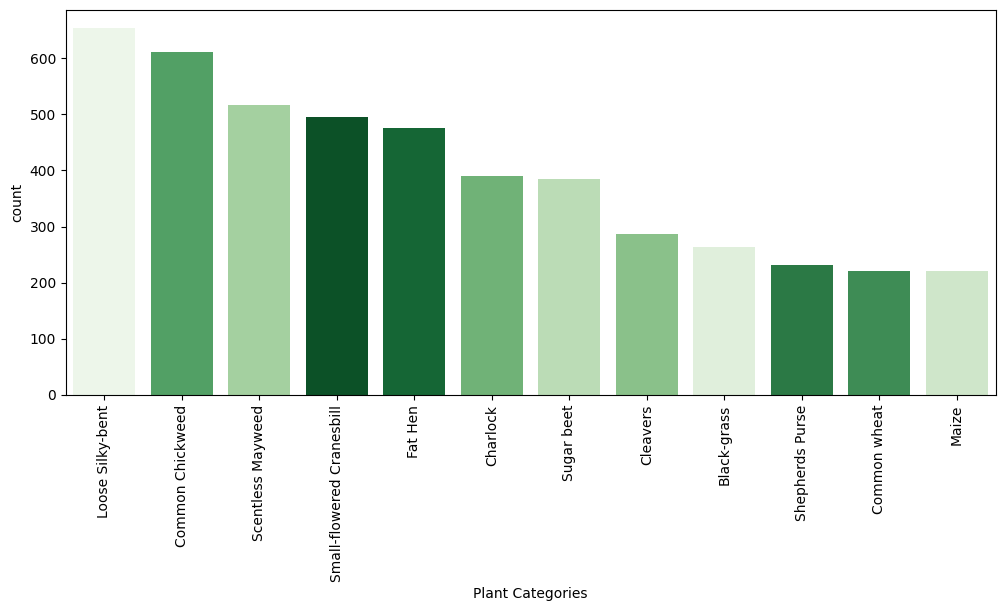

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the original Labels.csv to get the distribution for plotting
plot_labels_df = pd.read_csv('Labels.csv')

plt.rcParams["figure.figsize"] = (12,5)
sns.countplot(x=plot_labels_df['Label'], order = plot_labels_df['Label'].value_counts().index, palette='Greens_r', hue=plot_labels_df['Label'], legend=False)
plt.xlabel('Plant Categories')
plt.xticks(rotation=90)
plt.show()

Observation:

*   "Loose Silky bent" plant samples are more compared to other categories
*   Least plant samples are for "Common Wheat", "Maize"


##Plotting different plant categories in 12x12 grid

In [12]:
#Importing ImageGrid to plot the plant sample images
from mpl_toolkits.axes_grid1 import ImageGrid

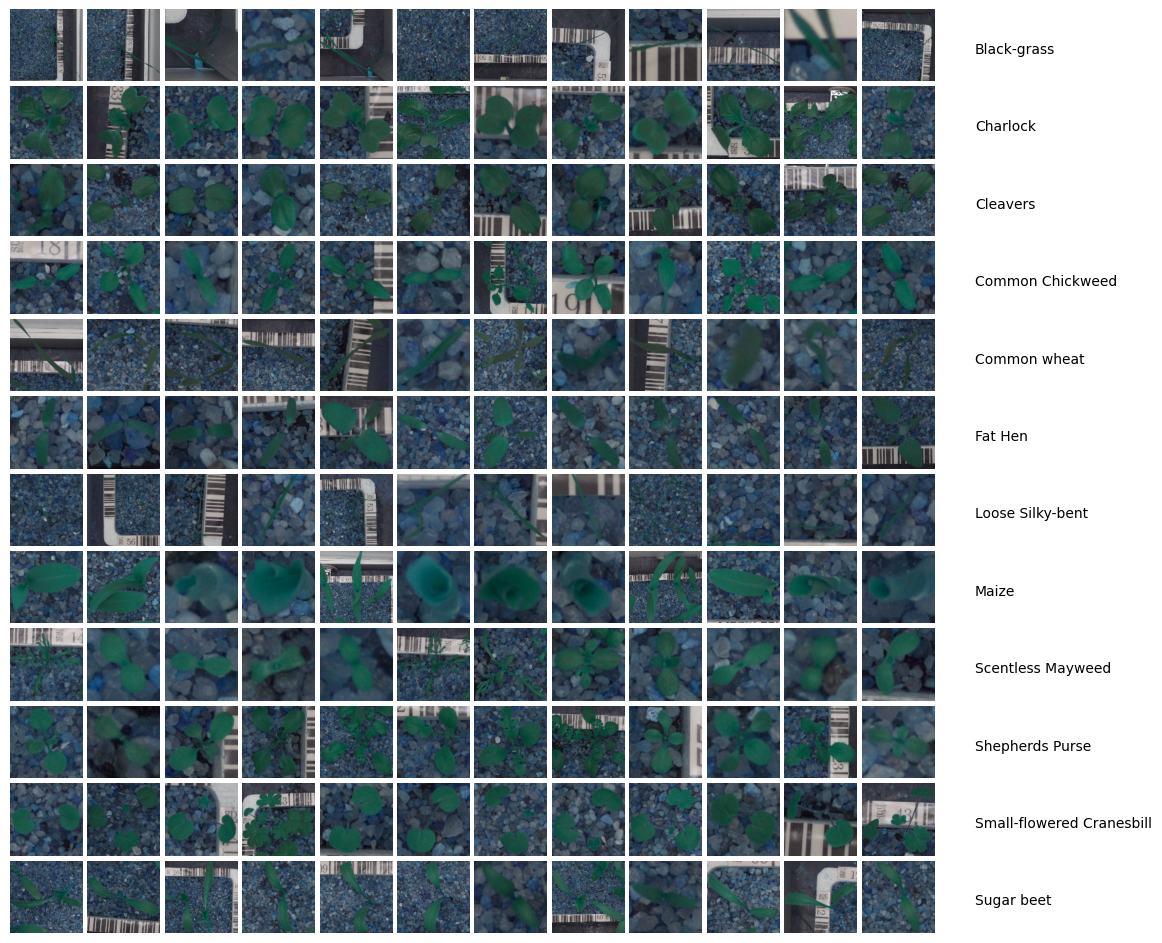

In [13]:
#defining a figure of size 12X12
fig = plt.figure(1, figsize=(num_categ, num_categ))
grid = ImageGrid(fig, 111, nrows_ncols=(num_categ, num_categ), axes_pad=0.05)
i = 0
index = ylabels.index

#Plottting 12 images from each plant category
for category_id, category in enumerate(categ):
  condition = ylabels["Label"] == category
  plant_indices = index[condition].tolist()
  for j in range(0,12):
      ax = grid[i]
      ax.imshow(data[plant_indices[j]])
      ax.axis('off')
      if i % num_categ == num_categ - 1:
        #printing the names for each caterogy
        ax.text(200, 70, category, verticalalignment='center')
      i += 1
plt.show();

#2. Data Pre-processing:

In [14]:
#Importing cv2_imshow for displaying images
from google.colab.patches import cv2_imshow

##Resizing and applying Gaussian Blur on a single image and plotting

Resized to 50% and applied Gaussian Blurring with kernel size 3X3


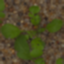



Original Image of size 128X128


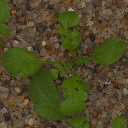

In [15]:
# Resizing the image size to half ie., from 128X128 to 64X64
img = cv2.resize(data[1000],None,fx=0.50,fy=0.50)

#Applying Gaussian Blur
img_g = cv2.GaussianBlur(img,(3,3),0)

#Displaying preprocessed and original images
print("Resized to 50% and applied Gaussian Blurring with kernel size 3X3")
cv2_imshow(img_g)
print('\n')
print("Original Image of size 128X128")
cv2_imshow(data[1000])

##Converting to HSV and applying mask for the background and focusing only on plant

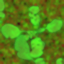

In [16]:

# Convert to HSV image
hsvImg = cv2.cvtColor(img_g, cv2.COLOR_BGR2HSV)
cv2_imshow(hsvImg)

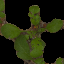

In [17]:
# Create mask (parameters - green color range)
lower_green = (25, 40, 50)
upper_green = (75, 255, 255)
mask = cv2.inRange(hsvImg, lower_green, upper_green)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

# Create bool mask
bMask = mask > 0

# Apply the mask
clearImg = np.zeros_like(img, np.uint8)  # Create empty image
clearImg[bMask] = img[bMask]  # Apply boolean mask to the origin image

#Masked Image after removing the background
cv2_imshow(clearImg)

##Applying Resize, Gaussian Blurr and Masking on All Images

In [18]:
data_copy = data.copy()

In [19]:
lower_green = (25, 40, 50)
upper_green = (75, 255, 255)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))
preprocessed_data_color = []

for img in data:
  resize_img = cv2.resize(img,None,fx=0.50,fy=0.50)
  Gblur_img = cv2.GaussianBlur(resize_img,(3,3),0)
  hsv_img = cv2.cvtColor(Gblur_img, cv2.COLOR_BGR2HSV)
  mask = cv2.inRange(hsv_img, lower_green, upper_green)
  mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
  bMask = mask > 0
  clearImg = np.zeros_like(resize_img, np.uint8)  # Create empty image
  clearImg[bMask] = resize_img[bMask]  # Apply boolean mask to the original image
  # clearImg1 = cv2.cvtColor(clearImg,cv2.COLOR_BGR2GRAY)

  preprocessed_data_color.append(clearImg)

#Preprocessed all plant images
preprocessed_data_color = np.asarray(preprocessed_data_color)

##Visualizing the preprocessed color plant images

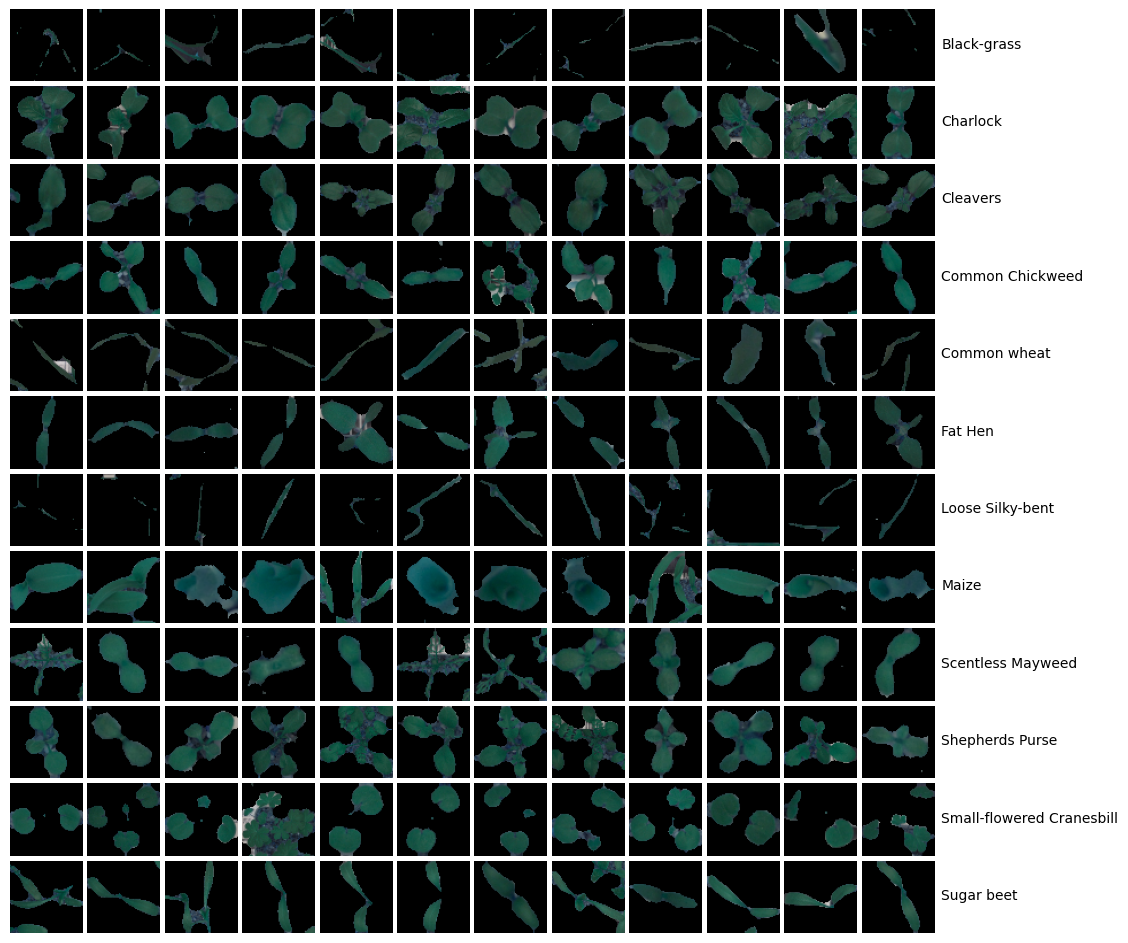

In [20]:
from mpl_toolkits.axes_grid1 import ImageGrid

fig = plt.figure(1, figsize=(num_categ, num_categ))
grid = ImageGrid(fig, 111, nrows_ncols=(num_categ, num_categ), axes_pad=0.05)
i = 0
index = ylabels.index

for category_id, category in enumerate(categ):
  condition = ylabels["Label"] == category
  plant_indices = index[condition].tolist()
  for j in range(0,12):
      ax = grid[i]
      # img = read_img(filepath, (224, 224))
      # ax.imshow(img / 255.)
      ax.imshow(preprocessed_data_color[plant_indices[j]]/255.)
      # ax[i].set_title(ylabels.iloc[i].to_list(),fontsize=7,rotation=45)
      ax.axis('off')
      if i % num_categ == num_categ - 1:
          ax.text(70, 30, category, verticalalignment='center')
      i += 1
plt.show();

In [21]:
preprocessed_data_color.shape

(4750, 64, 64, 3)

##Converting all color images to Grayscale images

In [22]:
preprocessed_data_gs = []
for img in preprocessed_data_color:
  gi = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  preprocessed_data_gs.append(gi)

preprocessed_data_gs = np.asarray(preprocessed_data_gs)

In [23]:
preprocessed_data_gs.shape

(4750, 64, 64)

Visualizing the preprocessed Grayscale plant images

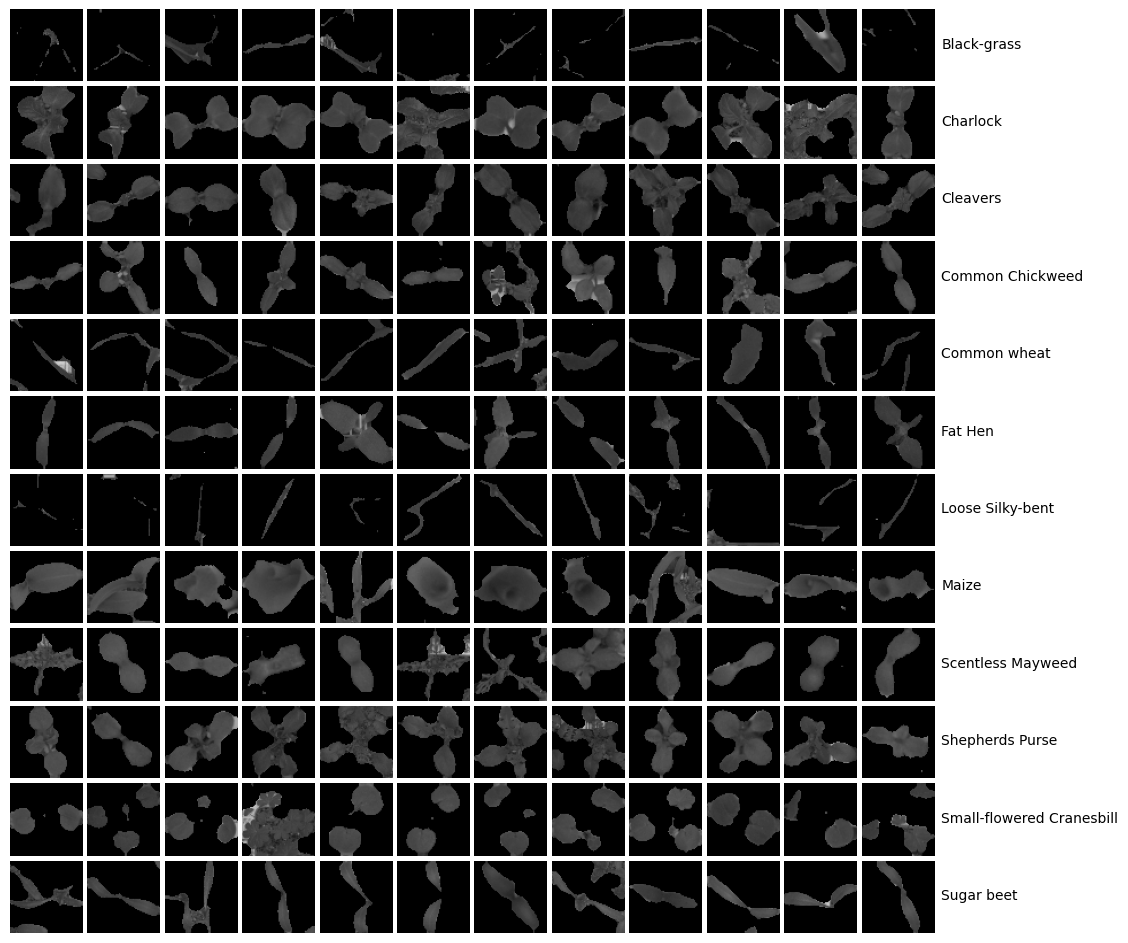

In [24]:
fig = plt.figure(1, figsize=(num_categ, num_categ))
grid = ImageGrid(fig, 111, nrows_ncols=(num_categ, num_categ), axes_pad=0.05)
i = 0
index = ylabels.index

for category_id, category in enumerate(categ):
  condition = ylabels["Label"] == category
  plant_indices = index[condition].tolist()
  for j in range(0,12):
      ax = grid[i]
      # img = read_img(filepath, (224, 224))
      # ax.imshow(img / 255.)
      ax.imshow(preprocessed_data_gs[plant_indices[j]],cmap='gray',vmin=0, vmax=255)
      # ax[i].set_title(ylabels.iloc[i].to_list(),fontsize=7,rotation=45)
      ax.axis('off')
      if i % num_categ == num_categ - 1:
          ax.text(70, 30, category, verticalalignment='center')
      i += 1
plt.show();

##Converting Grayscale to Edge images using Sobel and Laplacian

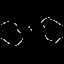

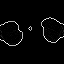

In [25]:
sobel = cv2.Sobel(preprocessed_data_gs[0]*255, cv2.CV_64F,1,1,ksize=3)
laplacian = cv2.Laplacian(preprocessed_data_gs[0]*255, cv2.CV_64F)
cv2_imshow(sobel)
print("\n")
cv2_imshow(laplacian)

##Converting all color images to Laplacian Edge detected images

In [26]:
preprocessed_data_Edge_Lap = []
for img in preprocessed_data_gs:
  egi = cv2.Laplacian(img*255, cv2.CV_64F)
  preprocessed_data_Edge_Lap.append(egi)

preprocessed_data_Edge_Lap = np.asarray(preprocessed_data_Edge_Lap)

In [27]:
preprocessed_data_Edge_Lap.shape

(4750, 64, 64)

##Visualizing the preprocessed Edge plant images

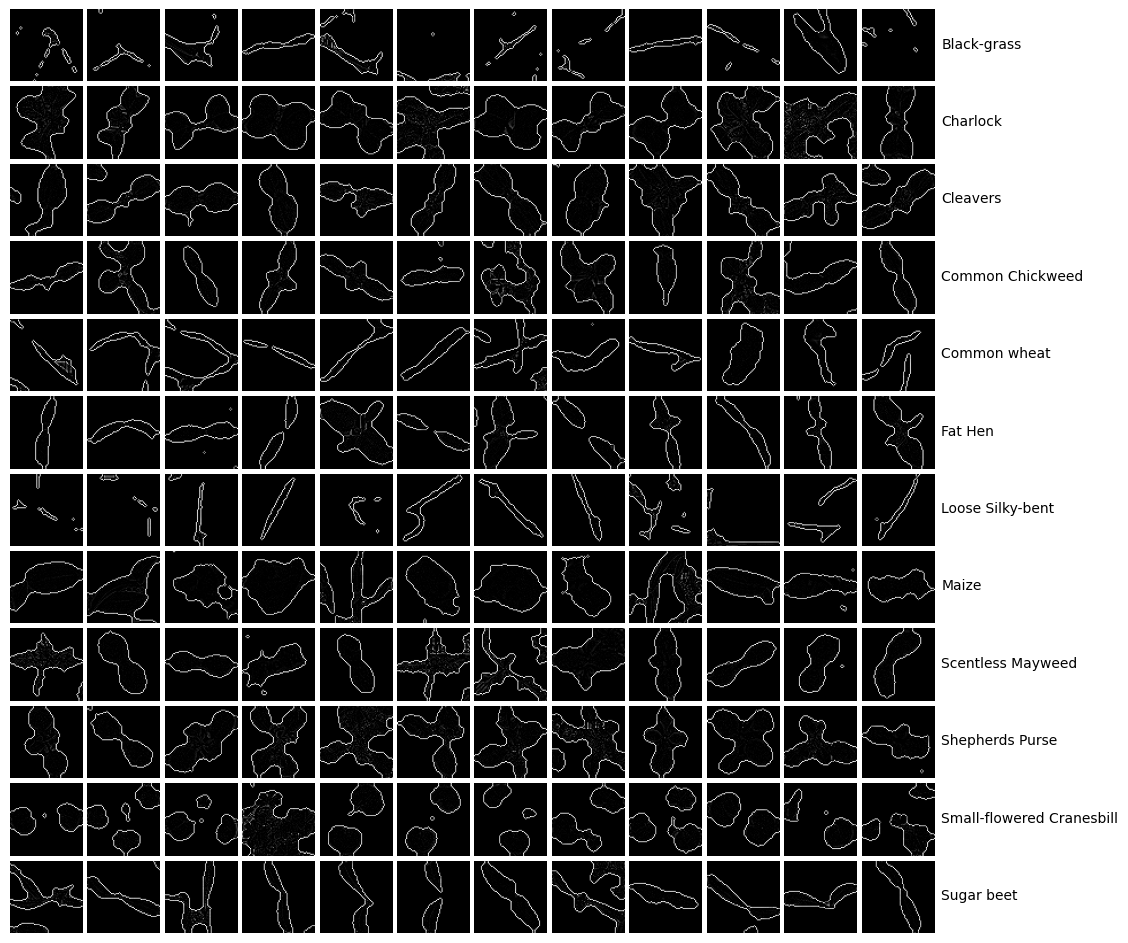

In [28]:
fig = plt.figure(1, figsize=(num_categ, num_categ))
grid = ImageGrid(fig, 111, nrows_ncols=(num_categ, num_categ), axes_pad=0.05)
i = 0
index = ylabels.index

for category_id, category in enumerate(categ):
  condition = ylabels["Label"] == category
  plant_indices = index[condition].tolist()
  for j in range(0,12):
      ax = grid[i]
      # img = read_img(filepath, (224, 224))
      # ax.imshow(img / 255.)
      ax.imshow(preprocessed_data_Edge_Lap[plant_indices[j]],cmap='gray',vmin=0, vmax=255)
      # ax[i].set_title(ylabels.iloc[i].to_list(),fontsize=7,rotation=45)
      ax.axis('off')
      if i % num_categ == num_categ - 1:
          ax.text(70, 30, category, verticalalignment='center')
      i += 1
plt.show();

#3. Working on the data to make it compatible:

##Normalization for Images

In [29]:
preprocessed_data_gs = preprocessed_data_gs / 255.
preprocessed_data_color = preprocessed_data_color / 255.
preprocessed_data_Edge_Lap = preprocessed_data_Edge_Lap / 255.

##Label Encoding and One-Hot encoding for Plant categories

In [30]:
ylabels['Label'] = ylabels['Label'].astype('category')
ylabels['Label'] = ylabels['Label'].cat.codes
ylabels.value_counts()

Label
6        654
3        611
8        516
10       496
5        475
1        390
11       385
2        287
0        263
9        231
7        221
4        221
Name: count, dtype: int64

In [31]:
from tensorflow.keras.utils import to_categorical

ylabels = to_categorical(ylabels, num_classes=12)

print("Shape of y_train:", ylabels.shape)
print("One value of y_train:", ylabels[0])

Shape of y_train: (4750, 12)
One value of y_train: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


###Split the dataset into training, validation and testing set

In [32]:
from sklearn.model_selection import train_test_split

val_split = 0.25
#1st split into train and test
X_train, X_test1, y_train, y_test1 = train_test_split(preprocessed_data_color, ylabels, test_size=0.30, stratify=ylabels,random_state = random_state)
#for my color image purpose and individual image pred.
X_train_color, X_test1_color, y_train_color, y_test1_color = train_test_split(data, ylabels, test_size=0.30, stratify=ylabels,random_state = random_state)
#2nd split into val and test
X_val, X_test, y_val, y_test = train_test_split(X_test1, y_test1, test_size=0.50, stratify=y_test1,random_state = random_state)
#for my color image purpose and individual image pred.
X_val_color, X_test_color, y_val_color, y_test_color = train_test_split(X_test1_color, y_test1, test_size=0.50, stratify=y_test1,random_state = random_state)

X = np.concatenate((X_train, X_test1))
y = np.concatenate((y_train, y_test1))

In [33]:
#Printing the shapes for all data splits
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_val shape: ", X_val.shape)
print("y_val shape: ", y_val.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)
print("X shape: ", X.shape)
print("y shape: ", y.shape)

X_train shape:  (3325, 64, 64, 3)
y_train shape:  (3325, 12)
X_val shape:  (712, 64, 64, 3)
y_val shape:  (712, 12)
X_test shape:  (713, 64, 64, 3)
y_test shape:  (713, 12)
X shape:  (4750, 64, 64, 3)
y shape:  (4750, 12)


Observation:

*   X_train has 3325 plant images
*   X_val has 712 plant images
*   X_test has 713 plant images
*   Plan images are in 64x64 shape with color channel



In [34]:
#Reshaping data into shapes compatible with Keras models
X_train = X_train.reshape(X_train.shape[0], 64, 64, 3)
X_val = X_val.reshape(X_val.shape[0], 64, 64, 3)
X_test = X_test.reshape(X_test.shape[0], 64, 64, 3)

In [35]:
#Converting type to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_val = X_val.astype('float32')


#4. Building CNN:

##First Trial---> Build CNN for preprocessed color Images

##Using ImageDataGenerator for common data augmentation techniques

In [37]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(shear_range = 0.2,rotation_range=180,  # randomly rotate images in the range
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally
        height_shift_range=0.1,  # randomly shift images vertically
        horizontal_flip=True,  # randomly flip images horizontally
        vertical_flip=True  # randomly flip images vertically
    )


# test_val_datagen = ImageDataGenerator(rescale = 1./255)

In [38]:
training_set = train_datagen.flow(X_train,y_train,batch_size=32,seed=random_state,shuffle=True)
# val_set = test_val_datagen.flow(X_val,y_val,batch_size=32,seed=random_state,shuffle=True)
# test_set = test_val_datagen.flow(X_test,y_test,batch_size=32,seed=random_state,shuffle=True)

##Importing required libraries for CNN

In [39]:
import tensorflow as tf
from keras import layers
from tensorflow.keras.models import Sequential          # Sequential groups a linear stack of layers into a tf.keras.Model.
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
#from tensorflow.keras.layers import Conv2D              # This layer creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs.
#from tensorflow.keras.layers import MaxPooling2D        # Max pooling operation for 2D spatial data.
#from tensorflow.keras.layers import Flatten             # Flattens the input. Does not affect the batch size.
#from tensorflow.keras.layers import Dense, Dropout      # Dropout: Applies Dropout to the input.
from tensorflow.keras import callbacks
from tensorflow.keras.callbacks import EarlyStopping     # Dense: Just your regular densely-connected NN layer.
from tensorflow.keras import optimizers

###Creating a CNN model containing multiple layers for image processing and dense layer for classification

###CNN Model layers:

*   Convolutional input layer, 32 feature maps with a size of 3X3 and a * rectifier activation function
*   Batch Normalization
*   Max Pool layer with size 2×2 and a stride of 2
*   Convolutional layer, 64 feature maps with a size of 3X3 and a rectifier activation function
*   Batch Normalization
*   Max Pool layer with size 2×2 and a stride of 2
*   Convolutional layer, 64 feature maps with a size of 3X3 and a rectifier activation function.
*   Batch Normalization
*   Max Pool layer with size 2×2 and a stride of 2
*   Flatten layer
*   Fully connected or Dense layers (with 512 and 128 neurons) with Relu Act.
*   Dropout layer to reduce overfitting or for regularization
*   O/p layer with Softwax fun. to detect multiple categories

In [40]:
# Initialising the CNN classifier
classifier = Sequential()

# Add a Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu', padding = 'same'))

#Adding Batch Normalization
classifier.add(layers.BatchNormalization())
# Add a Max Pooling layer of size 2X2
classifier.add(MaxPooling2D(pool_size = (2, 2),strides=2))

# Add another Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
classifier.add(Conv2D(64, (3, 3), activation = 'relu', padding = 'same'))
classifier.add(layers.BatchNormalization())
classifier.add(MaxPooling2D(pool_size = (2, 2),strides=2))

# Add another Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
classifier.add(Conv2D(64, (3, 3), activation = 'relu', padding = 'valid')) #no Padding
classifier.add(layers.BatchNormalization())
classifier.add(MaxPooling2D(pool_size = (2, 2),strides=2))

# Flattening the layer before fully connected layers
classifier.add(Flatten())

# Adding a fully connected layer with 512 neurons
classifier.add(layers.BatchNormalization())
classifier.add(Dense(units = 512, activation = 'relu'))

# Adding dropout with probability 0.2
classifier.add(Dropout(0.2))

# Adding a fully connected layer with 128 neurons
classifier.add(layers.BatchNormalization())
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dropout(0.2))

# The final output layer with 10 neurons to predict the categorical classifcation
classifier.add(Dense(units = 12, activation = 'softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [41]:
# Using Adam Optimizer and Categorical cross entropy as loss fun. and metrics improvement is Accuracy
# initiate Adam optimizer
adam_opt = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
classifier.compile(optimizer = adam_opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [42]:
# printing summary
classifier.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 3136)           │        12,544 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,606,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 12)             │         1,548 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,744,908 (6.66 MB)

 Trainable params: 1,737,292 (6.63 MB)

 Non-trainable params: 7,616 (29.75 KB)

In [43]:
# call back early stopping
callback_es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=20, min_delta=0.0001, restore_best_weights=True)

In [44]:
# Fitting the Classifier for Training set and validating for Validation set
batch_size = 32
epochs = 100

In [45]:
# Fit the mode
model1 = classifier.fit(training_set,
               batch_size=batch_size,
               epochs=epochs,
               validation_data = (X_val,y_val),
               shuffle=True,
               callbacks = [callback_es])

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


104/104 ━━━━━━━━━━━━━━━━━━━━ 19s 100ms/step - accuracy: 0.3141 - loss: 2.2250 - val_accuracy: 0.0604 - val_loss: 6.3510
Epoch 2/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.5176 - loss: 1.4149 - val_accuracy: 0.0604 - val_loss: 8.1603
Epoch 3/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.6014 - loss: 1.1769 - val_accuracy: 0.0604 - val_loss: 10.9719
Epoch 4/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.6446 - loss: 1.0627 - val_accuracy: 0.0604 - val_loss: 12.5510
Epoch 5/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.6922 - loss: 0.8398 - val_accuracy: 0.0857 - val_loss: 6.6873
Epoch 6/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.7207 - loss: 0.8024 - val_accuracy: 0.3652 - val_loss: 2.3034
Epoch 7/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.7416 - loss: 0.7445 - val_accuracy: 0.5702 - val_loss: 1.6824
Epoch 8/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.7509 - loss: 0.6792 - val_accu

In [46]:
# Evaluating on Test data
classifier.evaluate(X_test,y_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9015 - loss: 0.2864


[0.31058722734451294, 0.9018232822418213]

In [47]:
# Best Model accuracy which has least loss
best_model_accuracy = model1.history['accuracy'][np.argmin(model1.history['loss'])]
best_model_accuracy

0.9254135489463806

Observation:

*   Test Accuracy is 88.9%
*   Validation model accuracy for least loss is 89.17%

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


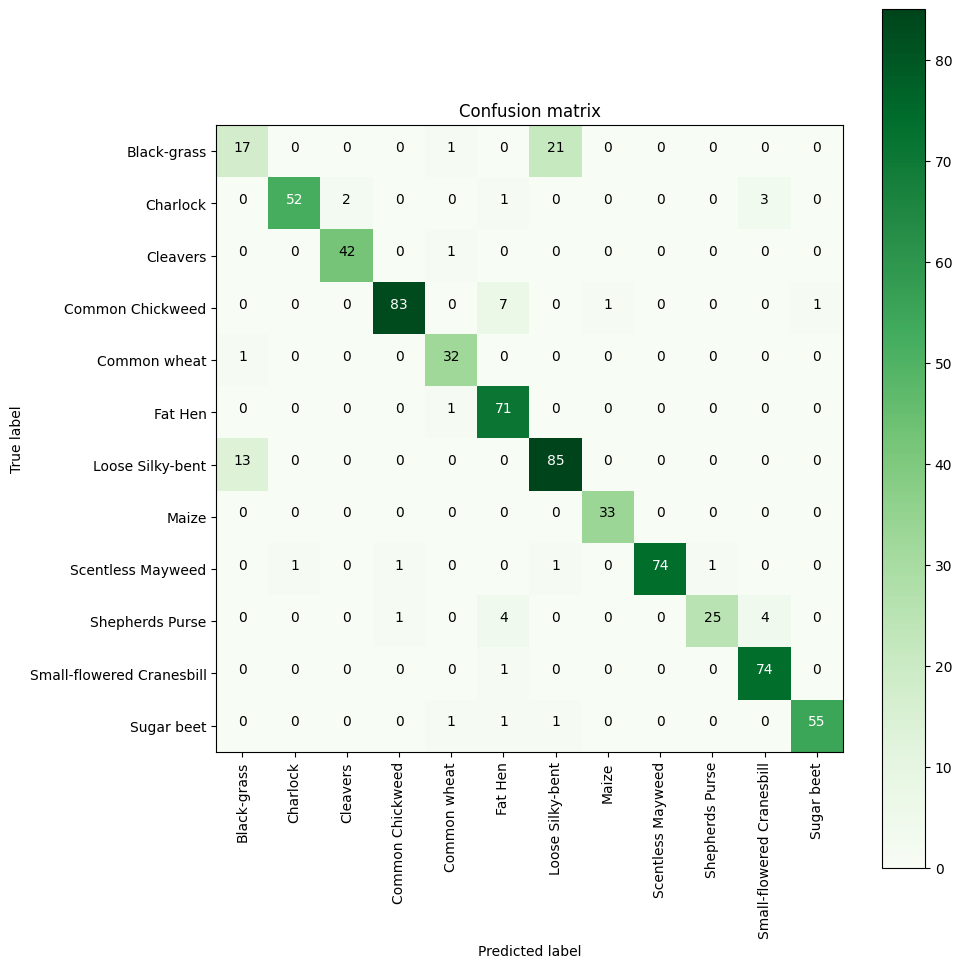

In [48]:
#Printing out the Confusion Matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):

    fig = plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
predY = classifier.predict(X_test)
predYClasses = np.argmax(predY, axis = 1)
trueY = np.argmax(y_test, axis = 1)

# confusion matrix
confusionMTX = confusion_matrix(trueY, predYClasses)

# plot the confusion matrix
plot_confusion_matrix(confusionMTX, classes = categ)

Observation:

Model have few wrong predictions for 'Losse Silky Bent' and 'black grass' --- 17 and 18

In [49]:
from sklearn.metrics import f1_score

print("AVR Class’s F1 score:-",f1_score(trueY, predYClasses, average='macro')) # macro, take the average of each class’s F-1 score:
print("Global +VE and -VE values:-",f1_score(trueY, predYClasses, average='micro')) #micro calculates positive and negative values globally
print("AVR F1 scores of number of instances in a class as weight:-",f1_score(trueY, predYClasses, average='weighted')) #F-1 scores are averaged by using the number of instances in a class as weight
print(f1_score(trueY, predYClasses, average=None))

AVR Class’s F1 score:- 0.8907484600480804
Global +VE and -VE values:- 0.9018232819074333
AVR F1 scores of number of instances in a class as weight:- 0.8998532269059444
[0.48571429 0.93693694 0.96551724 0.93785311 0.92753623 0.9044586
 0.82524272 0.98507463 0.97368421 0.83333333 0.94871795 0.96491228]


observation:

Above are the F1 scores based on various averaging methods

In [50]:
from sklearn.metrics import classification_report

print(classification_report(trueY, predYClasses, target_names=categ))

                           precision    recall  f1-score   support

              Black-grass       0.55      0.44      0.49        39
                 Charlock       0.98      0.90      0.94        58
                 Cleavers       0.95      0.98      0.97        43
         Common Chickweed       0.98      0.90      0.94        92
             Common wheat       0.89      0.97      0.93        33
                  Fat Hen       0.84      0.99      0.90        72
         Loose Silky-bent       0.79      0.87      0.83        98
                    Maize       0.97      1.00      0.99        33
        Scentless Mayweed       1.00      0.95      0.97        78
          Shepherds Purse       0.96      0.74      0.83        34
Small-flowered Cranesbill       0.91      0.99      0.95        75
               Sugar beet       0.98      0.95      0.96        58

                 accuracy                           0.90       713
                macro avg       0.90      0.89      0.89    

Observation:

Recall is very low for Black-grass

Precison is below .80 for Black grass and Loose Silky Bent

Even from Confusion matrix, we see model did not perform well for black grass

Other classes have better balane between precision and recall and a goof f1 score

Overall Accuracy is also great

In [51]:
from sklearn.metrics import multilabel_confusion_matrix

multilabel_confusion_matrix(trueY, predYClasses)

array([[[660,  14],
        [ 22,  17]],

       [[654,   1],
        [  6,  52]],

       [[668,   2],
        [  1,  42]],

       [[619,   2],
        [  9,  83]],

       [[676,   4],
        [  1,  32]],

       [[627,  14],
        [  1,  71]],

       [[592,  23],
        [ 13,  85]],

       [[679,   1],
        [  0,  33]],

       [[635,   0],
        [  4,  74]],

       [[678,   1],
        [  9,  25]],

       [[631,   7],
        [  1,  74]],

       [[654,   1],
        [  3,  55]]])

Each plant category level TP, FP, FN, TN can be seen from above matrix

In [52]:
history_df = pd.DataFrame(model1.history)
history_df.head()

accuracy      loss  val_accuracy   val_loss
0  0.390075  1.878688      0.060393   6.351015
1  0.538647  1.318181      0.060393   8.160256
2  0.625564  1.110506      0.060393  10.971898
3  0.666767  0.989446      0.060393  12.551048
4  0.688120  0.870809      0.085674   6.687286

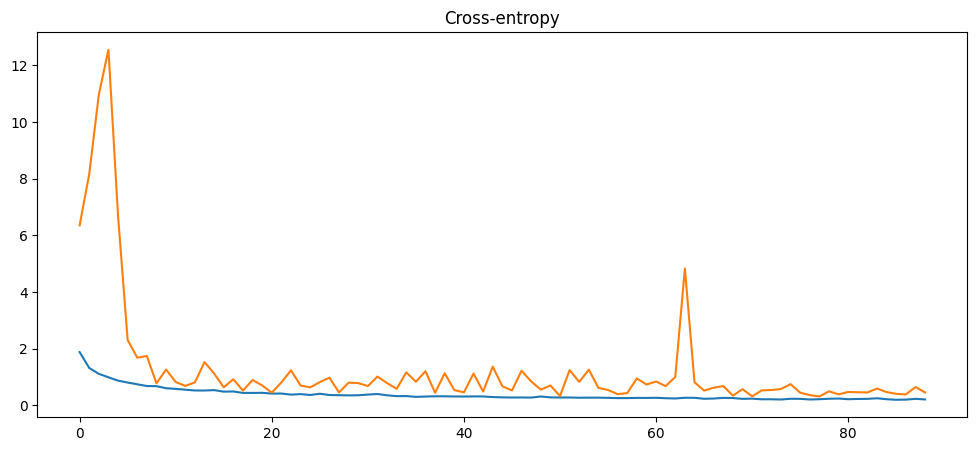

In [53]:
#checking loss visualization
plt.title('Cross-entropy')
plt.plot(model1.history['loss'])
plt.plot(model1.history['val_loss']);

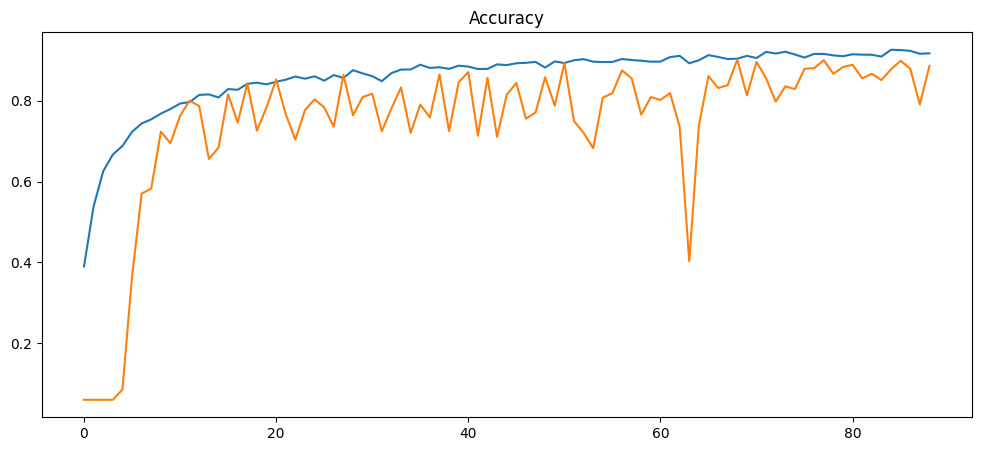

In [54]:
#checking the accuracy visualization
plt.title('Accuracy')
plt.plot(model1.history['accuracy'])
plt.plot(model1.history['val_accuracy']);

Observation:

Loss is decreasing and val loss is close to training loss

Accuracy of val set is also close to training accuracy

No overfitting or underfitting observerd based on the scores of val and testing sets

####Visualize predictions for x_test[2], x_test[3], x_test[33], x_test[36], x_test[59]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 756ms/step
Model predicted category for X_test 2 is:  [10]
Actual Category for X_test 2 is:  10
Actual Category Name for X_test 2 is:  Small-flowered Cranesbill


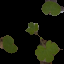

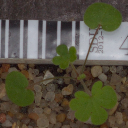

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Model predicted category for X_test 3 is:  [1]
Actual Category for X_test 3 is:  1
Actual Category Name for X_test 3 is:  Charlock


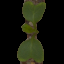

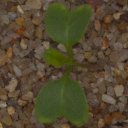

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Model predicted category for X_test 33 is:  [7]
Actual Category for X_test 33 is:  7
Actual Category Name for X_test 33 is:  Maize


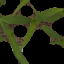

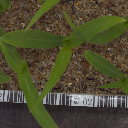

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Model predicted category for X_test 36 is:  [6]
Actual Category for X_test 36 is:  6
Actual Category Name for X_test 36 is:  Loose Silky-bent


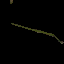

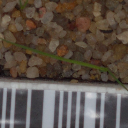

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Model predicted category for X_test 59 is:  [2]
Actual Category for X_test 59 is:  2
Actual Category Name for X_test 59 is:  Cleavers


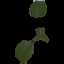

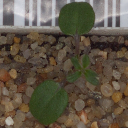

In [55]:
pred_2 = np.argmax(classifier.predict(np.expand_dims(X_test[2],axis=0)),axis=1)
actual_2 = np.argmax(y_test[2])
print("Model predicted category for X_test 2 is: ", pred_2)
print("Actual Category for X_test 2 is: ",actual_2 )
print("Actual Category Name for X_test 2 is: ",categ[actual_2] )
cv2_imshow(X_test[2]*255)
print("\n")
cv2_imshow(X_test_color[2])
print("="*100)
pred_3 = np.argmax(classifier.predict(np.expand_dims(X_test[3],axis=0)),axis=1)
actual_3 = np.argmax(y_test[3])
print("Model predicted category for X_test 3 is: ", pred_3)
print("Actual Category for X_test 3 is: ",actual_3 )
print("Actual Category Name for X_test 3 is: ",categ[actual_3] )
cv2_imshow(X_test[3]*255)
print("\n")
cv2_imshow(X_test_color[3])
print("="*100)
pred_33 = np.argmax(classifier.predict(np.expand_dims(X_test[33],axis=0)),axis=1)
actual_33 = np.argmax(y_test[33])
print("Model predicted category for X_test 33 is: ", pred_33)
print("Actual Category for X_test 33 is: ",actual_33 )
print("Actual Category Name for X_test 33 is: ",categ[actual_33] )
cv2_imshow(X_test[33]*255)
print("\n")
cv2_imshow(X_test_color[33])
print("="*100)
pred_36 = np.argmax(classifier.predict(np.expand_dims(X_test[36],axis=0)),axis=1)
actual_36 = np.argmax(y_test[36])
print("Model predicted category for X_test 36 is: ", pred_36)
print("Actual Category for X_test 36 is: ",actual_36 )
print("Actual Category Name for X_test 36 is: ",categ[actual_36] )
cv2_imshow(X_test[36]*255)
print("\n")
cv2_imshow(X_test_color[36])
print("="*100)
pred_59 = np.argmax(classifier.predict(np.expand_dims(X_test[59],axis=0)),axis=1)
actual_59 = np.argmax(y_test[59])
print("Model predicted category for X_test 59 is: ", pred_59)
print("Actual Category for X_test 59 is: ",actual_59 )
print("Actual Category Name for X_test 59 is: ",categ[actual_59] )
cv2_imshow(X_test[59]*255)
print("\n")
cv2_imshow(X_test_color[59])
print("="*100)

Observation:

All the above predictions made by model are equal to Actuals

In [90]:
classifier.save('./classifier_color.keras')                     # save classifier (model) and architecture to single file


Conclusion:

1. We have built a CNN-model to predict the class of a plant, which works quite well.

2. Increasing number of epochs and/or adding layers to a model can even increase the performance)

3. CNN with Batch Normalization, Maxpooling, dropouts + Dense layers is a good combination for image classification

##Try 2 --> Creating CNN model for Grayscale Images

In [60]:
#Split the dataset into training, testing, and validation set
from sklearn.model_selection import train_test_split

val_split = 0.25
#1st split into train and test
X_train, X_test1, y_train, y_test1 = train_test_split(preprocessed_data_gs, ylabels, test_size=0.30, stratify=ylabels,random_state = random_state)
#for my color image purpose and individual image pred.
X_train_color, X_test1_color, y_train_color, y_test1_color = train_test_split(data, ylabels, test_size=0.30, stratify=ylabels,random_state = random_state)
#2nd split into val and test
X_val, X_test, y_val, y_test = train_test_split(X_test1, y_test1, test_size=0.50, stratify=y_test1,random_state = random_state)
#for my color image purpose and individual image pred.
X_val_color, X_test_color, y_val_color, y_test_color = train_test_split(X_test1_color, y_test1, test_size=0.50, stratify=y_test1,random_state = random_state)

X = np.concatenate((X_train, X_test1))
y = np.concatenate((y_train, y_test1))

In [61]:
#Printing the shapes for all data splits
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_val shape: ", X_val.shape)
print("y_val shape: ", y_val.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)
print("X shape: ", X.shape)
print("y shape: ", y.shape)

X_train shape:  (3325, 64, 64)
y_train shape:  (3325, 12)
X_val shape:  (712, 64, 64)
y_val shape:  (712, 12)
X_test shape:  (713, 64, 64)
y_test shape:  (713, 12)
X shape:  (4750, 64, 64)
y shape:  (4750, 12)


Observation:

1. X_train has 3325 plant images

2. X_val has 712 plant images

3. X_test has 713 plant images

4. Plan images are in 64X64 shape with grayscale

In [62]:
#Reshaping data into shapes compatible with Keras models
X_train = X_train.reshape(X_train.shape[0], 64, 64, 1)
X_val = X_val.reshape(X_val.shape[0], 64, 64, 1)
X_test = X_test.reshape(X_test.shape[0], 64, 64, 1)

In [63]:
#Converting type to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_val = X_val.astype('float32')

In [65]:
#Using ImageDataGenerator for common data augmentation techniques
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(shear_range = 0.2,rotation_range=180,  # randomly rotate images in the range
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally
        height_shift_range=0.1,  # randomly shift images vertically
        horizontal_flip=True,  # randomly flip images horizontally
        vertical_flip=True  # randomly flip images vertically
    )


# test_val_datagen = ImageDataGenerator(rescale = 1./255)

In [66]:
training_set = train_datagen.flow(X_train,y_train,batch_size=batch_size,seed=random_state,shuffle=True)
# val_set = test_val_datagen.flow(X_val,y_val,batch_size=32,seed=random_state,shuffle=True)
# test_set = test_val_datagen.flow(X_test,y_test,batch_size=32,seed=random_state,shuffle=True)

###Creating a CNN model containing multiple layers for image processing and dense layer for classification

###CNN Model layers:

*   Convolutional input layer, 32 feature maps with a size of 3X3 and a * rectifier activation function
*   Batch Normalization
*   Max Pool layer with size 2×2 and a stride of 2
*   Convolutional layer, 64 feature maps with a size of 3X3 and a rectifier activation function
*   Batch Normalization
*   Max Pool layer with size 2×2 and a stride of 2
*   Convolutional layer, 64 feature maps with a size of 3X3 and a rectifier activation function.
*   Batch Normalization
*   Max Pool layer with size 2×2 and a stride of 2
*   Convolutional layer, 64 feature maps with a size of 3X3 and a rectifier activation function
*   Batch Normalization
*   Max Pool layer with size 2×2 and a stride of 2
*   Flatten layer
*   Fully connected or Dense layers (with 512 and 128 neurons) with Relu Act.
*   Dropout layer to reduce overfitting or for regularization
*   O/p layer with Softwax fun. to detect multiple categories

##CNN Model building

In [67]:
# Initialising the CNN classifier1
classifier1 = Sequential()

# Add a Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
classifier1.add(Conv2D(32, (3, 3), input_shape = (64, 64, 1), activation = 'relu', padding = 'same'))
#Adding Batch Normalization
classifier1.add(layers.BatchNormalization())
# Add a Max Pooling layer of size 2X2
classifier1.add(MaxPooling2D(pool_size = (2, 2),strides=2))


# Add another Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
classifier1.add(Conv2D(64, (3, 3), activation = 'relu', padding = 'same'))
classifier1.add(layers.BatchNormalization())
classifier1.add(MaxPooling2D(pool_size = (2, 2),strides=2))

# Add another Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
classifier1.add(Conv2D(64, (3, 3), activation = 'relu', padding = 'valid')) #no Padding
classifier1.add(layers.BatchNormalization())
classifier1.add(MaxPooling2D(pool_size = (2, 2),strides=2))


# Flattening the layer before fully connected layers
classifier1.add(Flatten())

# Adding a fully connected layer with 512 neurons
classifier1.add(layers.BatchNormalization())
classifier1.add(Dense(units = 512, activation = 'elu'))

# Adding dropout with probability 0.2
classifier1.add(Dropout(0.2))


# Adding a fully connected layer with 128 neurons
classifier1.add(layers.BatchNormalization())
classifier1.add(Dense(units = 256, activation = 'elu'))
# classifier1.add(Dropout(0.2))


# The final output layer with 10 neurons to predict the categorical classifcation
classifier1.add(Dense(units = 12, activation = 'softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [68]:
#Printing the Summary
classifier1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 3136)           │        12,544 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │     1,606,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 12)             │         3,084 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,811,532 (6.91 MB)

 Trainable params: 1,803,916 (6.88 MB)

 Non-trainable params: 7,616 (29.75 KB)

###Compiling and Fitting the model

In [69]:
# initiate Adam optimizer
adam_opt = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
classifier1.compile(optimizer = adam_opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

callback_es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=20, min_delta=0.001, restore_best_weights=True)

model2 = classifier1.fit(training_set,
               batch_size=batch_size,
               epochs=epochs,
               validation_data = (X_val,y_val),
               shuffle=True,
               callbacks = [callback_es])

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 14s 70ms/step - accuracy: 0.2702 - loss: 2.6078 - val_accuracy: 0.0604 - val_loss: 10.8253
Epoch 2/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.3993 - loss: 1.7397 - val_accuracy: 0.0604 - val_loss: 12.1732
Epoch 3/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.4683 - loss: 1.5309 - val_accuracy: 0.0604 - val_loss: 9.4147
Epoch 4/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.5237 - loss: 1.3785 - val_accuracy: 0.0604 - val_loss: 8.0313
Epoch 5/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.5476 - loss: 1.3082 - val_accuracy: 0.0815 - val_loss: 5.8779
Epoch 6/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.5553 - loss: 1.2172 - val_accuracy: 0.2570 - val_loss: 2.5072
Epoch 7/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.5875 - loss: 1.1286 - val_accuracy: 0.2725 - val_loss: 2.9968
Epoch 8/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.6104 - loss: 1.0921

In [70]:
#Evaluating on Test data
classifier1.evaluate(X_test,y_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.8084 - loss: 0.5529


[0.5465648770332336, 0.8078541159629822]

In [71]:
#Best model accuracy from all epochs which has least loss
best_model_accuracy = model2.history['accuracy'][np.argmin(model2.history['loss'])]
best_model_accuracy

0.865864634513855

Observation:

Test Accuracy is 79%
Validation model accuracy for least loss is 82%

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


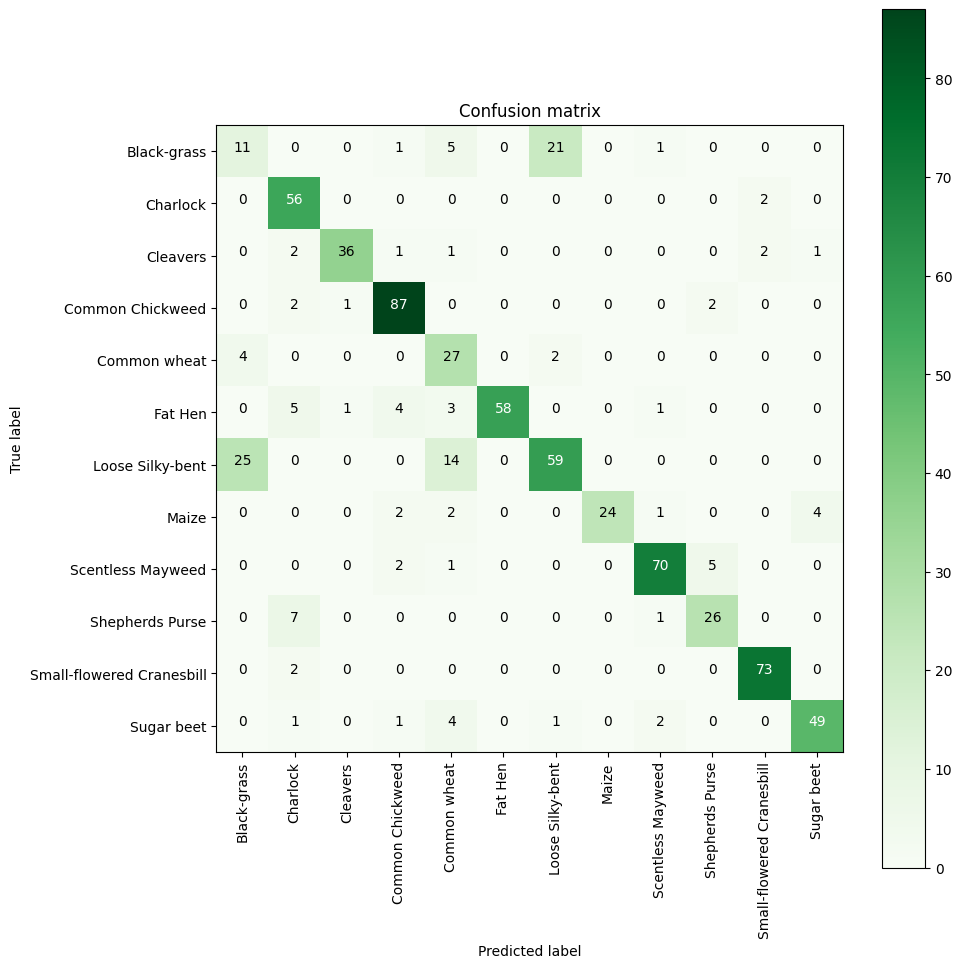

In [72]:
#Printing out the Confusion Matrix

from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):

    fig = plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
predY = classifier1.predict(X_test)
predYClasses = np.argmax(predY, axis = 1)
trueY = np.argmax(y_test, axis = 1)

# confusion matrix
confusionMTX = confusion_matrix(trueY, predYClasses)

# plot the confusion matrix
plot_confusion_matrix(confusionMTX, classes = categ)

Observation:

1.  Model did not perform well for:

2.  Black grass and Loose Silky bent

3.  Common wheat and loose silky bent

4.  Shepherds purse and scentless mayweed

In [73]:
#Storing in a DF each epoch's loss and Accuracy for training and validation sets
history_df2 = pd.DataFrame(model2.history)
history_df2.head()

accuracy      loss  val_accuracy   val_loss
0  0.327218  2.190298      0.060393  10.825313
1  0.435188  1.640836      0.060393  12.173200
2  0.474286  1.497100      0.060393   9.414684
3  0.523609  1.357162      0.060393   8.031293
4  0.553684  1.266253      0.081461   5.877923

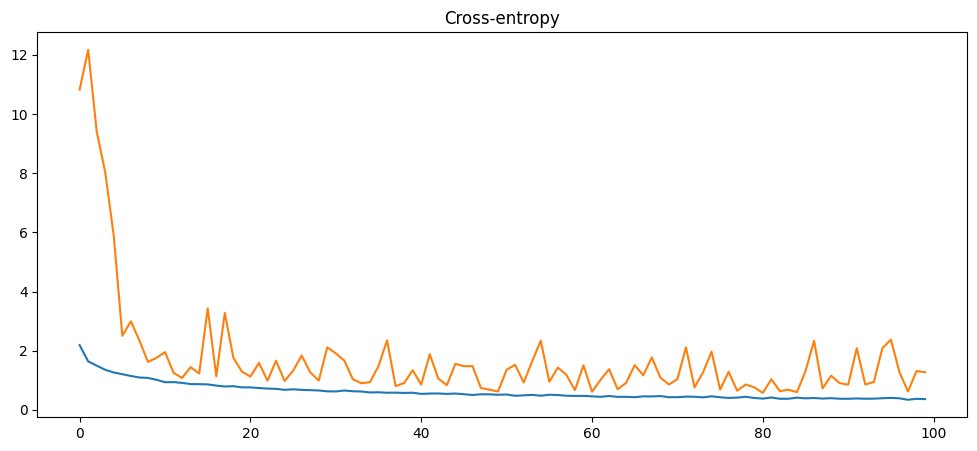

In [74]:
#checking loss visualization
plt.title('Cross-entropy')
plt.plot(model2.history['loss'])
plt.plot(model2.history['val_loss']);

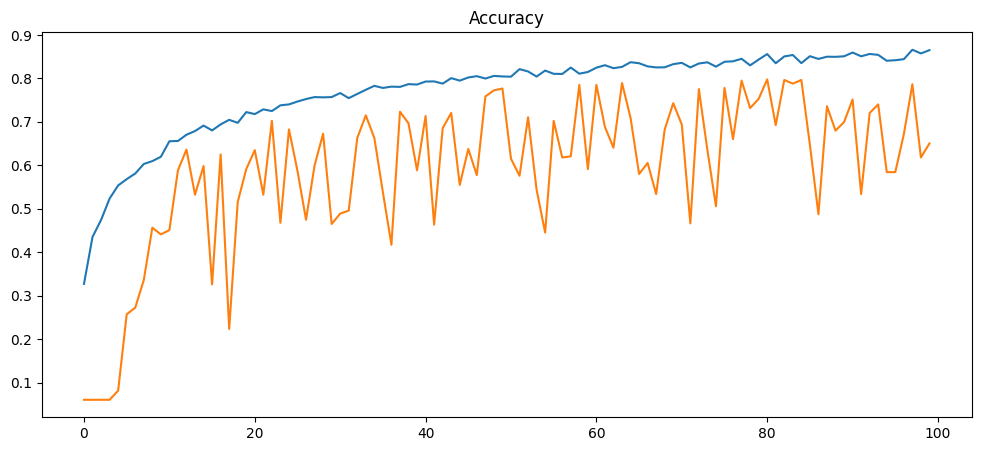

In [75]:
#checking the accuracy visualization
plt.title('Accuracy')
plt.plot(model2.history['accuracy'])
plt.plot(model2.history['val_accuracy']);


###Visualize predictions for x_test[2], x_test[3], x_test[33], x_test[36], x_test[59]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 530ms/step
Model predicted category for X_test 2 is:  [10]
Actual Category for X_test 2 is:  10
Actual Category Name for X_test 2 is:  Small-flowered Cranesbill


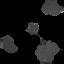

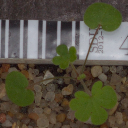

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Model predicted category for X_test 3 is:  [1]
Actual Category for X_test 3 is:  1
Actual Category Name for X_test 3 is:  Charlock


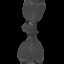

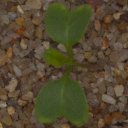

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Model predicted category for X_test 33 is:  [7]
Actual Category for X_test 33 is:  7
Actual Category Name for X_test 33 is:  Maize


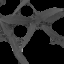

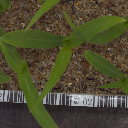

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Model predicted category for X_test 36 is:  [6]
Actual Category for X_test 36 is:  6
Actual Category Name for X_test 36 is:  Loose Silky-bent


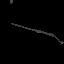

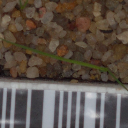

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Model predicted category for X_test 59 is:  [2]
Actual Category for X_test 59 is:  2
Actual Category Name for X_test 59 is:  Cleavers


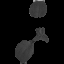

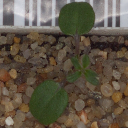

In [76]:
pred_2 = np.argmax(classifier1.predict(np.expand_dims(X_test[2],axis=0)),axis=1)
actual_2 = np.argmax(y_test[2])
print("Model predicted category for X_test 2 is: ", pred_2)
print("Actual Category for X_test 2 is: ",actual_2 )
print("Actual Category Name for X_test 2 is: ",categ[actual_2] )
cv2_imshow(X_test[2]*255)
print("\n")
cv2_imshow(X_test_color[2])
print("="*100)
pred_3 = np.argmax(classifier1.predict(np.expand_dims(X_test[3],axis=0)),axis=1)
actual_3 = np.argmax(y_test[3])
print("Model predicted category for X_test 3 is: ", pred_3)
print("Actual Category for X_test 3 is: ",actual_3 )
print("Actual Category Name for X_test 3 is: ",categ[actual_3] )
cv2_imshow(X_test[3]*255)
print("\n")
cv2_imshow(X_test_color[3])
print("="*100)
pred_33 = np.argmax(classifier1.predict(np.expand_dims(X_test[33],axis=0)),axis=1)
actual_33 = np.argmax(y_test[33])
print("Model predicted category for X_test 33 is: ", pred_33)
print("Actual Category for X_test 33 is: ",actual_33 )
print("Actual Category Name for X_test 33 is: ",categ[actual_33] )
cv2_imshow(X_test[33]*255)
print("\n")
cv2_imshow(X_test_color[33])
print("="*100)
pred_36 = np.argmax(classifier1.predict(np.expand_dims(X_test[36],axis=0)),axis=1)
actual_36 = np.argmax(y_test[36])
print("Model predicted category for X_test 36 is: ", pred_36)
print("Actual Category for X_test 36 is: ",actual_36 )
print("Actual Category Name for X_test 36 is: ",categ[actual_36] )
cv2_imshow(X_test[36]*255)
print("\n")
cv2_imshow(X_test_color[36])
print("="*100)
pred_59 = np.argmax(classifier1.predict(np.expand_dims(X_test[59],axis=0)),axis=1)
actual_59 = np.argmax(y_test[59])
print("Model predicted category for X_test 59 is: ", pred_59)
print("Actual Category for X_test 59 is: ",actual_59 )
print("Actual Category Name for X_test 59 is: ",categ[actual_59] )
cv2_imshow(X_test[59]*255)
print("\n")
cv2_imshow(X_test_color[59])
print("="*100)

Observation:

1.  All above observations are properly predicted by model

In [79]:
#Storing the model and its weights
classifier1.save('./classifier_grayscale.keras')                     # save classifier (model) and architecture to single file
classifier1.save_weights('./classifier_grayscale.weights.h5')

In [80]:
!ls

classifier_color.h5
classifier_color.keras
classifier_color.weights.h5
classifier_color_weights.h5
classifier_grayscale.h5
classifier_grayscale.keras
classifier_grayscale.weights.h5
classifier_grayscale_weights.h5
CV_Project_PresentationTemplate.pptx
High_Code_Plant_Seedling_Classification.ipynb
images.npy
Labels.csv
Samson_Akomolafe_High_Code_Plant_Seedling_Classification_Project.html
Samson_Akomolafe_High_Code_Plant_Seedling_Classification_Project.ipynb


***Conclusion:***

1.  We have built a CNN-model to predict the class of a plant, which works quite well.

2.  Increasing number of epochs and/or adding layers to a model can even increase the performance

3.  CNN with Batch Normalization, Max pooling, dropouts and Dense layers is a good combination for image classification

## Data Overview

## Exploratory Data Analysis

1. How are these different category plant images different from each other?
2. Is the dataset provided an imbalance? (Check with using bar plots)

### Visual Characteristics Analysis

Let's meticulously examine the visual output for each of the 12 plant categories. As you go through each category, consider the following:

1.  **Black-grass**:
    *   **Leaf Shape:** Generally narrow, elongated.
    *   **Texture:** Appears smooth.
    *   **Size/Density:** Often grows in dense clusters, upright.
    *   **Color Nuances:** Consistent green.
    *   **Growth Pattern:** Upright, grass-like.

2.  **Charlock**:
    *   **Leaf Shape:** Wider, somewhat lobed or irregular edges.
    *   **Texture:** Appears slightly rough or textured.
    *   **Size/Density:** Medium size, less dense than grasses.
    *   **Color Nuances:** Bright to medium green.
    *   **Growth Pattern:** More spread out, forming a basal rosette in early stages.

3.  **Cleavers**:
    *   **Leaf Shape:** Oval to lance-shaped, often in whorls around the stem.
    *   **Texture:** Distinctly hairy or 'sticky' appearance.
    *   **Size/Density:** Can be sprawling, medium density.
    *   **Color Nuances:** Medium green.
    *   **Growth Pattern:** Prostrate or climbing, spreading growth.

4.  **Common Chickweed**:
    *   **Leaf Shape:** Small, oval to heart-shaped.
    *   **Texture:** Smooth to slightly hairy.
    *   **Size/Density:** Small, often dense, low-growing.
    *   **Color Nuances:** Light to medium green.
    *   **Growth Pattern:** Creeping, mat-forming.

5.  **Common Wheat**:
    *   **Leaf Shape:** Very narrow, elongated, grass-like.
    *   **Texture:** Smooth.
    *   **Size/Density:** Upright, relatively uniform growth.
    *   **Color Nuances:** Consistent medium green.
    *   **Growth Pattern:** Upright, slender blades.

6.  **Fat Hen**:
    *   **Leaf Shape:** Diamond or triangular shape, often with wavy or toothed edges.
    *   **Texture:** Appears powdery or mealy on the underside of leaves (though hard to see in images).
    *   **Size/Density:** Can grow quite large, bushy, medium density.
    *   **Color Nuances:** Bluish-green or grayish-green.
    *   **Growth Pattern:** Upright, branching.

7.  **Loose Silky-bent**:
    *   **Leaf Shape:** Narrow, pointed, grass-like.
    *   **Texture:** Smooth, silky sheen.
    *   **Size/Density:** Upright, forms tufts.
    *   **Color Nuances:** Medium to dark green.
    *   **Growth Pattern:** Similar to other grasses but with a distinct, often looser, form.

8.  **Maize**:
    *   **Leaf Shape:** Very broad, long, lance-shaped leaves.
    *   **Texture:** Smooth, prominent veins.
    *   **Size/Density:** Large, upright, low density of individual plants but can form dense rows.
    *   **Color Nuances:** Deep green.
    *   **Growth Pattern:** Strong upright stem, distinct leaf arrangement.

9.  **Scentless Mayweed**:
    *   **Leaf Shape:** Finely dissected, fern-like leaves.
    *   **Texture:** Appears delicate, feathery.
    *   **Size/Density:** Bushy, medium density.
    *   **Color Nuances:** Bright green.
    *   **Growth Pattern:** Erect to spreading, much-branched.

10. **Shepherds Purse**:
    *   **Leaf Shape:** Basal rosette with deeply lobed leaves, stem leaves are smaller and less lobed.
    *   **Texture:** Slightly hairy.
    *   **Size/Density:** Small to medium, rosette-forming.
    *   **Color Nuances:** Light to medium green.
    *   **Growth Pattern:** Rosette at base, central flowering stem.

11. **Small-flowered Cranesbill**:
    *   **Leaf Shape:** Rounded, palmately lobed leaves.
    *   **Texture:** Hairy or fuzzy.
    *   **Size/Density:** Medium, often sprawling.
    *   **Color Nuances:** Medium green.
    *   **Growth Pattern:** Spreading, sometimes prostrate.

12. **Sugar beet**:
    *   **Leaf Shape:** Large, oval to heart-shaped, broad leaves.
    *   **Texture:** Smooth, slightly glossy.
    *   **Size/Density:** Large, forms a dense rosette.
    *   **Color Nuances:** Dark green.
    *   **Growth Pattern:** Large basal rosette.

### Distinguishing Features Between Categories:

*   **Grass-like vs. Broadleaf:** Black-grass, Common Wheat, and Loose Silky-bent are distinctly grass-like with narrow leaves, differentiating them from all other broadleaf species.
*   **Leaf Dissection:** Scentless Mayweed has uniquely finely dissected leaves, unlike any other category.
*   **Leaf Texture:** Cleavers and Small-flowered Cranesbill are noticeably hairy/fuzzy, while Fat Hen has a powdery/mealy appearance. Maize and Sugar beet have smooth, broad leaves.
*   **Growth Pattern:** Shepherds Purse starts with a clear basal rosette, and Common Chickweed is a low-growing mat. Maize grows very upright with distinct broad leaves. Cleavers tends to sprawl.
*   **Color Nuances:** Fat Hen often shows a distinct bluish-green or grayish-green hue compared to the brighter greens of many others.

## Summarize Plant Image Differences


### Distinguishing Features Between Categories

Based on the visualization of plant images across 12 categories, several key visual characteristics differentiate them, which a classification model would likely leverage:

*   **Leaf Shape and Structure:**
    *   Some plants like 'Charlock' and 'Scentless Mayweed' exhibit broad, often lobed or toothed leaves. 'Small-flowered Cranesbill' has distinctly palmate or deeply lobed leaves.
    *   In contrast, 'Loose Silky-bent' and 'Common Wheat' have very slender, grass-like leaves.
    *   'Fat Hen' and 'Sugar beet' often show more ovate or diamond-shaped leaves, sometimes with a powdery appearance.

*   **Leaf Color and Texture:**
    *   While most plants are green, variations in shades (lighter vs. darker green) and the presence of veins or a glossy/dull surface can be observed. The pre-processing step with Gaussian blur and HSV masking helps in highlighting the plant structure by removing background noise, which is crucial for texture analysis.
    *   'Black-grass' might have a darker, more uniform green, while others might show lighter hues.

*   **Growth Pattern and Density:**
    *   Some plants, like 'Common Chickweed', tend to grow in dense, sprawling mats, while others, such as 'Maize', exhibit a more upright, singular stem growth with larger, distinct leaves.
    *   'Shepherds Purse' often presents a basal rosette of leaves before sending up a flower stalk.

*   **Edge Characteristics (as highlighted by Laplacian Edge Detection):**
    *   The Laplacian edge detection revealed distinct patterns. Plants with complex leaf structures (e.g., 'Small-flowered Cranesbill') produce more intricate edge maps, while simple, linear leaves (e.g., 'Loose Silky-bent') show fewer, straighter edges. This can be a strong feature for models to distinguish between broadleaf and grass-like plants.

*   **Presence of Hairs or Spines:**
    *   Though not explicitly visible in all scaled images, some species are known for trichomes (hairs) which could contribute to a textured appearance that models might pick up.

*   **Overall Plant Silhouette/Boundary:**
    *   The general outline or silhouette of the plant, especially after masking the background, provides a strong cue. For instance, the compact, often circular shape of some young seedlings versus the elongated or irregular shapes of others.

The classification model likely relies on a combination of these features, with convolutional layers extracting hierarchical representations of edges, textures, and shapes that are unique to each plant category. The data augmentation techniques applied (rotation, zoom, shifts, flips) help the model generalize these features regardless of the plant's orientation or slight variations in appearance.

## Summary:

### Q&A
The task's implicit question was to analyze the visual characteristics of plant seedling categories and provide a detailed summary of how they are visually distinct, highlighting key features for classification. This was successfully addressed by meticulously examining and categorizing the visual features for each of the 12 plant types and then summarizing their distinguishing characteristics.

### Data Analysis Key Findings
*   **Comprehensive Visual Differentiation:** Detailed visual characteristics were identified for 12 plant categories, including specific leaf shapes (e.g., narrow and elongated for Black-grass, finely dissected for Scentless Mayweed, palmate for Small-flowered Cranesbill), textures (e.g., hairy for Cleavers, smooth for Maize, powdery for Fat Hen), sizes/densities, color nuances (e.g., Fat Hen's distinct bluish-green), and growth patterns (e.g., Common Chickweed's mat-forming, Shepherds Purse's basal rosette, Maize's upright growth).
*   **Key Distinguishing Feature Categories:** The analysis consolidated the differences into several key categories valuable for classification models:
    *   **Leaf Shape and Structure:** Ranging from slender, grass-like leaves (e.g., 'Loose Silky-bent', 'Common Wheat') to broad, lobed, or intricate leaves (e.g., 'Charlock', 'Scentless Mayweed', 'Small-flowered Cranesbill').
    *   **Leaf Color and Texture:** Variations in green hues and surface properties were noted, with pre-processing techniques like Gaussian blur and HSV masking identified as crucial for highlighting texture.
    *   **Growth Pattern and Density:** Distinctive patterns were observed, such as dense, sprawling growth versus upright singular stems or basal rosettes.
    *   **Edge Characteristics:** Laplacian edge detection revealed intricate edge maps for complex leaves and simpler, straighter edges for linear leaves, serving as a strong feature to differentiate broadleaf from grass-like plants.
    *   **Overall Plant Silhouette/Boundary:** The general outline of the plant after background removal was identified as a significant visual cue.

### Insights or Next Steps
*   Plant seedling classification relies on a combination of diverse visual features, from macroscopic growth patterns to microscopic leaf textures and edge complexities.
*   Further analysis could involve applying more advanced image processing techniques to quantify these identified visual features, creating robust numerical representations for training machine learning models.


## Summary:

### Q&A
Yes, the dataset is imbalanced. "Loose Silky-bent" is the most represented plant with 654 samples, while "Common Wheat" and "Maize" are the least represented, each with only 221 samples. This indicates a significant uneven distribution across plant categories.

### Data Analysis Key Findings
*   The dataset contains 12 distinct plant categories.
*   The most frequently occurring plant category, "Loose Silky-bent" (label 6), has 654 samples.
*   The least frequently occurring plant categories, "Common Wheat" (label 7) and "Maize" (label 4), each have 221 samples.
*   The sample counts for other categories range between these extremes, confirming a substantial class imbalance.

### Insights or Next Steps
*   The significant class imbalance (ranging from 221 to 654 samples per class) could negatively impact the performance of machine learning models, especially for minority classes.
*   Consider implementing techniques such as oversampling (e.g., SMOTE), undersampling, or using class weights during model training to address the detected imbalance and improve model generalization.


In [91]:
!pip install nbconvert

In [92]:
%%shell
jupyter nbconvert --to html '/content/drive/My Drive/UTA - AIML/Computer_Vision_Project/Samson_Akomolafe_High_Code_Plant_Seedling_Classification_Project_a.ipynb'

[NbConvertApp] WARNING | pattern '/content/drive/My Drive/Computer_Vision_Projectt/Samson_Akomolafe_High_Code_Plant_Seedling_Classification_Project_a.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer ye

CalledProcessError: Command 'jupyter nbconvert --to html '/content/drive/My Drive/Computer_Vision_Projectt/Samson_Akomolafe_High_Code_Plant_Seedling_Classification_Project_a.ipynb'
' returned non-zero exit status 255.